In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import qgrid
import matplotlib.patches as mpatches
fields_values=['Date','Open','High', 'Low','IndexClose','VixClose']
IndexData= pd.read_csv('C:/users/hajyhass/downloads/ExpandedData.csv', sep=',', usecols=fields_values)

In [2]:
IndexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 6 columns):
Date          750 non-null object
Open          750 non-null float64
High          750 non-null float64
Low           750 non-null float64
IndexClose    750 non-null float64
VixClose      750 non-null float64
dtypes: float64(5), object(1)
memory usage: 35.3+ KB


In [3]:
IndexData.Date = pd.to_datetime(IndexData.Date)
IndexData.set_index('Date', inplace=True)

In [4]:
IndexData=IndexData.drop(['Open','High','Low'],axis=1)


In [5]:
IndexData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2017-01-30 to 2020-01-22
Data columns (total 2 columns):
IndexClose    750 non-null float64
VixClose      750 non-null float64
dtypes: float64(2)
memory usage: 17.6 KB


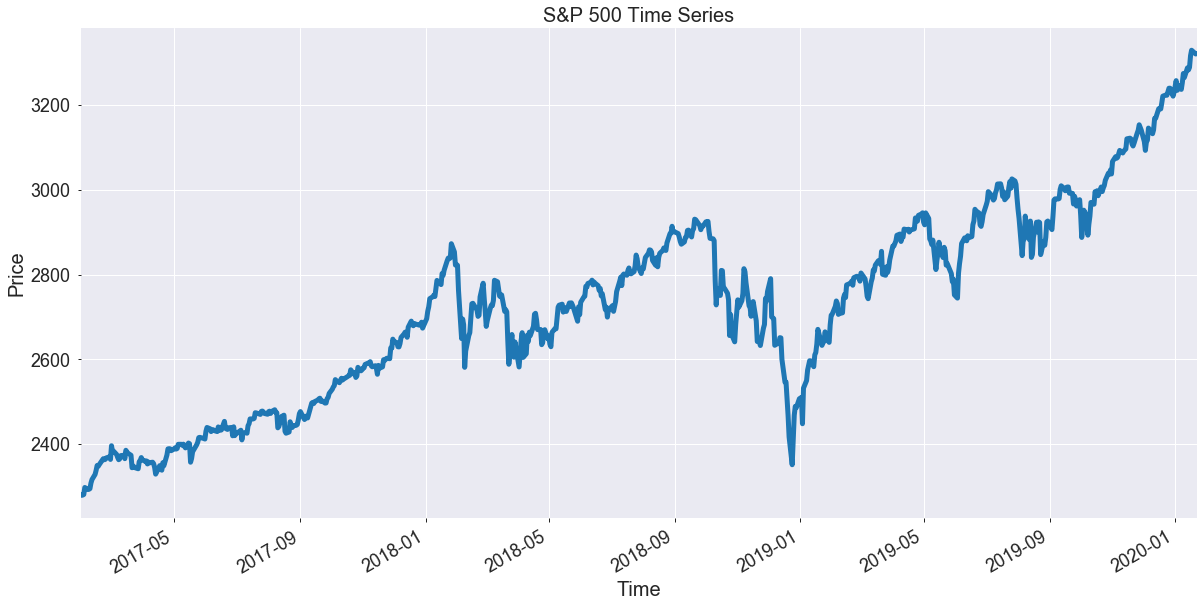

In [6]:
IndexData['IndexClose'].plot(figsize=(20,10), linewidth=5, fontsize=18)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('S&P 500 Time Series', fontsize=20)
plt.show()

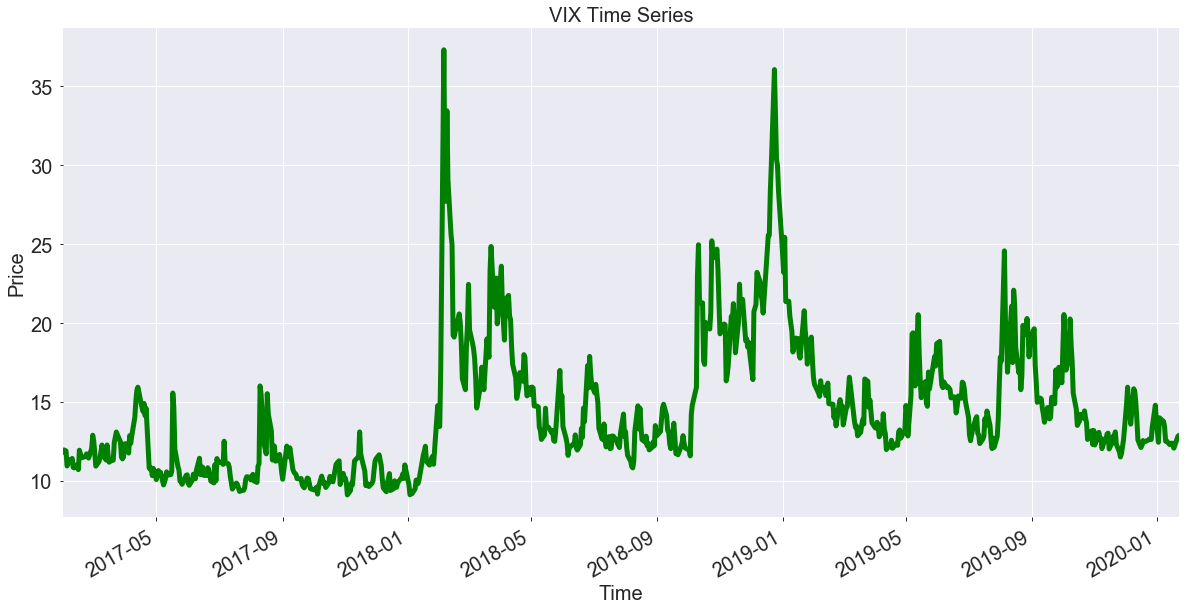

In [7]:
IndexData['VixClose'].plot(figsize=(20,10), linewidth=5, fontsize=20, color ='green')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('VIX Time Series', fontsize=20)
plt.show()

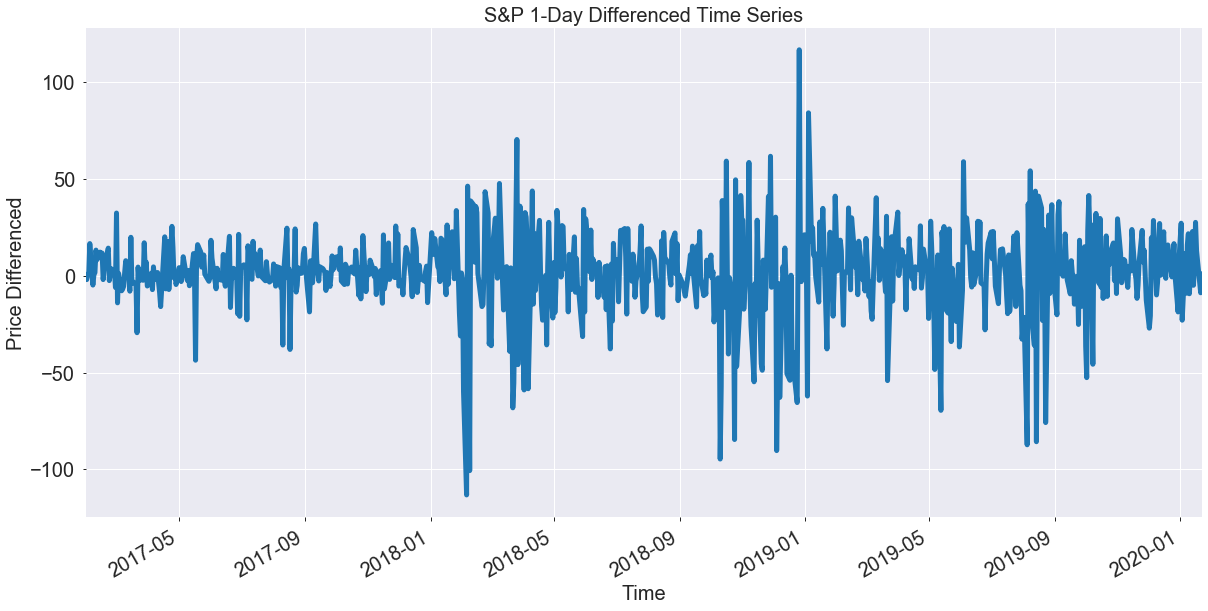

In [8]:
IndexData['IndexClose'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price Differenced', fontsize=20)
plt.title('S&P 1-Day Differenced Time Series', fontsize=20)
plt.show()

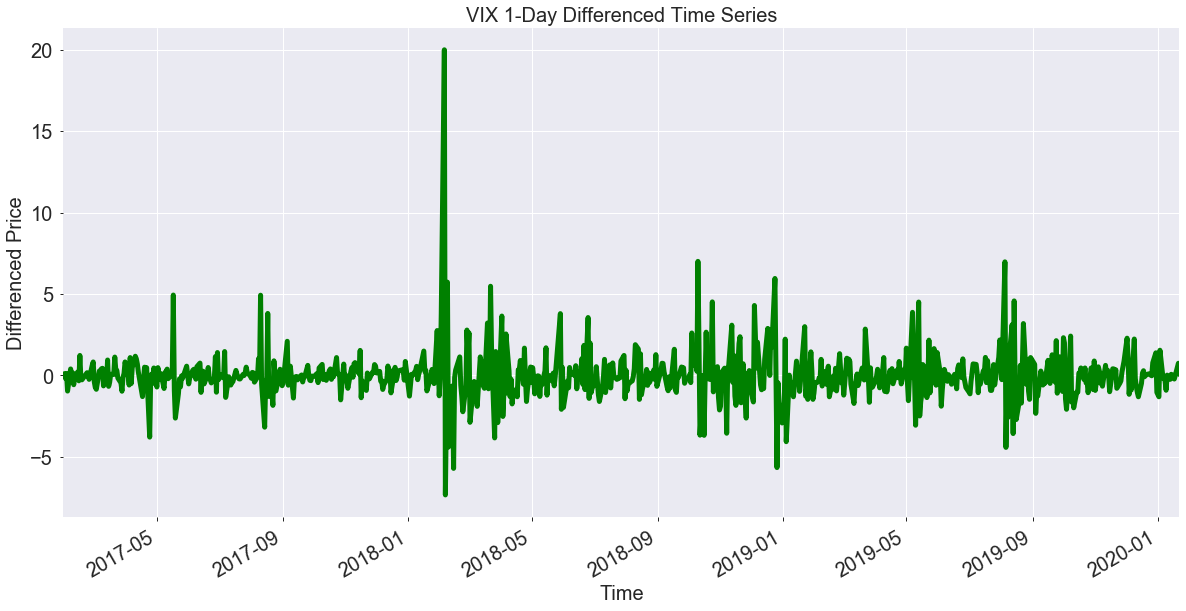

In [9]:
IndexData['VixClose'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20, color='green')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Differenced Price', fontsize=20)
plt.title('VIX 1-Day Differenced Time Series', fontsize=20)
plt.show()

In [10]:
Shocks=IndexData.diff()

In [11]:
Shocks

,IndexClose,VixClose
Date,,
2017-01-30,NaN,NaN
2017-01-31,-2.029785,0.11
2017-02-01,0.679932,-0.18
2017-02-02,1.300049,0.12
2017-02-03,16.569824,-0.96
...,...,...
2020-01-15,6.140137,0.03
2020-01-16,27.520020,-0.10
2020-01-17,12.810058,-0.22


In [12]:
df_merge = pd.merge(IndexData,Shocks, on='Date')

In [13]:
df_merge

,IndexClose_x,VixClose_x,IndexClose_y,VixClose_y
Date,,,,
2017-01-30,2280.899902,11.88,NaN,NaN
2017-01-31,2278.870117,11.99,-2.029785,0.11
2017-02-01,2279.550049,11.81,0.679932,-0.18
2017-02-02,2280.850098,11.93,1.300049,0.12
2017-02-03,2297.419922,10.97,16.569824,-0.96
...,...,...,...,...
2020-01-15,3289.290039,12.42,6.140137,0.03
2020-01-16,3316.810059,12.32,27.520020,-0.10
2020-01-17,3329.620117,12.10,12.810058,-0.22


In [14]:
df_merge['IndexReturn']=df_merge['IndexClose_y'] / df_merge['IndexClose_x'].shift(1)

In [15]:
df_merge['VixReturn']=df_merge['VixClose_y'] / df_merge['VixClose_x'].shift(1)

In [16]:
df_merge

,IndexClose_x,VixClose_x,IndexClose_y,VixClose_y,IndexReturn,VixReturn
Date,,,,,,
2017-01-30,2280.899902,11.88,NaN,NaN,NaN,NaN
2017-01-31,2278.870117,11.99,-2.029785,0.11,-0.000890,0.009259
2017-02-01,2279.550049,11.81,0.679932,-0.18,0.000298,-0.015013
2017-02-02,2280.850098,11.93,1.300049,0.12,0.000570,0.010161
2017-02-03,2297.419922,10.97,16.569824,-0.96,0.007265,-0.080469
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,6.140137,0.03,0.001870,0.002421
2020-01-16,3316.810059,12.32,27.520020,-0.10,0.008367,-0.008052
2020-01-17,3329.620117,12.10,12.810058,-0.22,0.003862,-0.017857


In [17]:
df_merge.drop(df_merge.head(1).index, inplace=True)

In [18]:
df_merge=df_merge.drop(['IndexClose_y','VixClose_y'],axis=1)

In [19]:
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn
Date,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259
2017-02-01,2279.550049,11.81,0.000298,-0.015013
2017-02-02,2280.850098,11.93,0.000570,0.010161
2017-02-03,2297.419922,10.97,0.007265,-0.080469
2017-02-06,2292.560059,11.37,-0.002115,0.036463
...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421
2020-01-16,3316.810059,12.32,0.008367,-0.008052
2020-01-17,3329.620117,12.10,0.003862,-0.017857


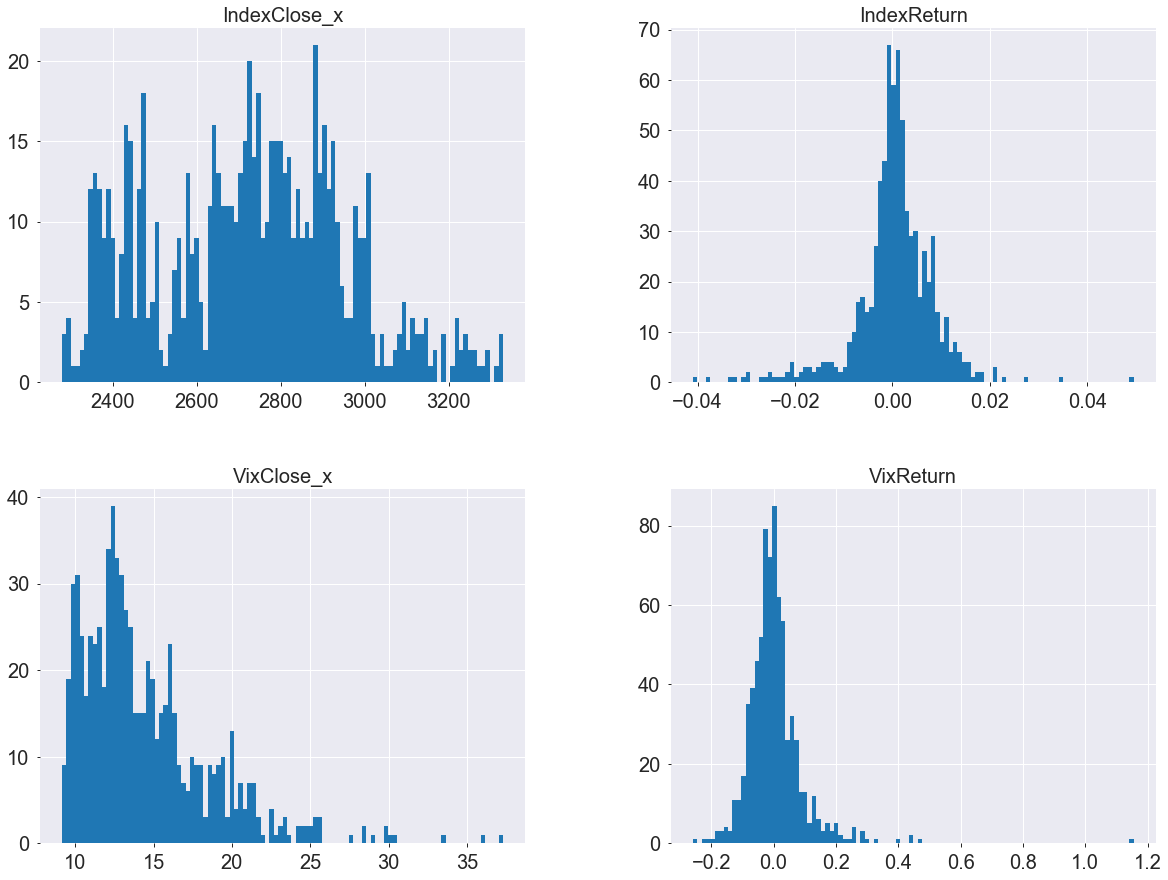

In [20]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
            }
mlp.rcParams.update(params)
df_merge.hist(figsize=(20,15),bins=100)
plt.show()

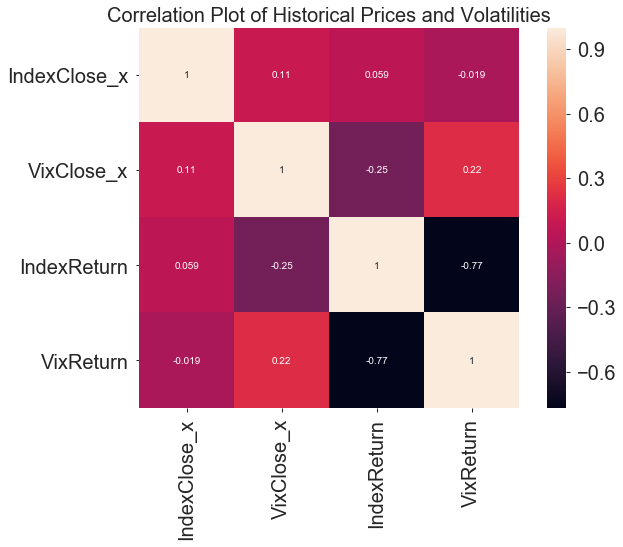

In [21]:
plt.figure(figsize=(10,7))
plt.title('Correlation Plot of Historical Prices and Volatilities')
plt.yticks(rotation=45)
sns.heatmap(df_merge.corr(),annot=True, square=True)
plt.show()

## https://tradingninja.com/2017/01/black-scholes-options-price-calculator-python-code/


In [22]:
from math import *

#first define these 2 functions
def d1(S,X,T,r,sigma):
    return (log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))

def d2(S,X,T,r,sigma):
    return d1(S,X,T,r,sigma)-sigma*sqrt(T)

#define the call option price function
def bs_call(S,X,T,r,sigma):
    return S*CND(d1(S,X,T,r,sigma))-X*exp(-r*T)*CND(d2(S,X,T,r,sigma))

#define the put options price function
def bs_put(S,X,T,r,sigma):
    return X*exp(-r*T)-S + bs_call(S,X,T,r,sigma)

#define cumulative standard normal distribution
def CND(X):
     (a1,a2,a3,a4,a5)=(0.31938153,-0.356563782,1.781477937,-1.821255978,1.330274429)
     L = abs(X)
     K=1.0/(1.0+0.2316419*L)
     w=1.0-1.0/sqrt(2*pi)*exp(-L*L/2.)*(a1*K+a2*K*K+a3*pow(K,3)+a4*pow(K,4)+a5*pow(K,5))
     if X<0:
        w=1.0-w
     return w

## https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

In [23]:
def black_scholes_row(row):
    row['AnalyticalCallVal']= bs_call(row['IndexClose_x'],row['IndexClose_x'],31/365,0.015,row['VixClose_x']/100)
    row['AnalyticalPutVal']= bs_put(row['IndexClose_x'],row['IndexClose_x'],31/365,0.015,row['VixClose_x']/100)
    return row


In [24]:
df_merge=df_merge.apply(lambda row: black_scholes_row(row), axis=1)

In [25]:
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn,AnalyticalCallVal,AnalyticalPutVal
Date,,,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259,33.217525,30.316156
2017-02-01,2279.550049,11.81,0.000298,-0.015013,32.751078,29.848843
2017-02-02,2280.850098,11.93,0.000570,0.010161,33.087509,30.183618
2017-02-03,2297.419922,10.97,0.007265,-0.080469,30.767502,27.842516
2017-02-06,2292.560059,11.37,-0.002115,0.036463,31.766955,28.848156
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421,49.587800,45.400003
2020-01-16,3316.810059,12.32,0.008367,-0.008052,49.617601,45.394766
2020-01-17,3329.620117,12.10,0.003862,-0.017857,48.958798,44.719654


In [26]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF
from sklearn.preprocessing import StandardScaler as sc
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [27]:
index_X_train=df_merge[['IndexClose_x','VixClose_x']][0:500]
index_X_test=df_merge[['IndexClose_x','VixClose_x']][500:]
index_y_train=df_merge[['AnalyticalCallVal','AnalyticalPutVal']][0:500]
index_y_test=df_merge[['AnalyticalCallVal','AnalyticalPutVal']][500:]


#sc.fit(index_X_train)
#X_train_std = sc.transform(index_X_train)
#X_test_std = sc.transform(index_X_test)

In [28]:
index_y_train.shape, index_X_train.shape

((500, 2), (500, 2))

## https://scikit-learn.org/stable/modules/gaussian_process.html

## https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [30]:
kernel = RBF(10, (1e-5, 1e5)) *DotProduct(1,(1e-9, 1e9)) + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0,alpha=0.1,n_restarts_optimizer=10).fit(index_X_train, index_y_train)
print("R^2 :",gpr.score(index_X_train, index_y_train))
index_y_pred= gpr.predict(index_X_test)
print("coefficeints: ",gpr.kernel_)
#gpr.predict(index_X_test, return_std=True)

C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([4.53246581e-05, 2.58354029e-19, 4.93410853e-02]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 20, 'warnflag': 2}
  ConvergenceWarning)
C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([6.68904027e-04, 2.95694698e-23, 4.93410875e-02]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 16, 'warnflag': 2}
  ConvergenceWarning)


R^2 : 0.9999999512000876
coefficeints:  RBF(length_scale=3.61e+03) * DotProduct(sigma_0=1e-09) + WhiteKernel(noise_level=1e-05)


C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [31]:
index_y_test.tail(50)

,AnalyticalCallVal,AnalyticalPutVal
Date,,
2019-11-08,45.372980,41.434990
2019-11-11,47.506011,43.575749
2019-11-12,47.544444,43.608033
2019-11-13,48.727799,44.788587
2019-11-14,48.948352,45.005842
2019-11-15,45.702166,41.729317
2019-11-18,47.211253,43.236405
2019-11-19,48.632305,44.659812
2019-11-20,48.160913,44.203342


In [32]:
index_y_pred

array([[59.65990261, 56.29385291],
       [60.37013425, 57.00898637],
       [56.73122117, 53.31781004],
       [53.79603373, 50.35327604],
       [52.49322675, 49.04737541],
       [51.55123296, 48.08203153],
       [51.28489611, 47.79936006],
       [50.56868108, 47.09089856],
       [53.20646052, 49.76122024],
       [51.19908907, 47.75151923],
       [52.02173991, 48.57172528],
       [50.97022883, 47.47574234],
       [51.82686429, 48.32181028],
       [53.50633945, 50.01057962],
       [49.86681321, 46.33302363],
       [49.8445508 , 46.30546493],
       [47.1539219 , 43.60854694],
       [48.40485716, 44.8719847 ],
       [45.63595908, 42.08043717],
       [50.03943282, 46.47953045],
       [51.03737984, 47.48029134],
       [49.48689749, 45.93174438],
       [49.60599155, 46.06088359],
       [46.01087416, 42.44132183],
       [49.26765918, 45.71195841],
       [49.56814737, 46.01646998],
       [52.46191823, 48.93341235],
       [54.74896407, 51.24913011],
       [52.9134338 ,

In [33]:
data = pd.DataFrame({'predcall': index_y_pred[0:,0],'predput': index_y_pred[0:,1],'testcall': index_y_test.iloc[0:,0],'testput': index_y_test.iloc[0:,1]})
#data = pd.DataFrame({'testcall': index_y_test.iloc[0:,0],'testput': index_y_test.iloc[0:,1]})



## Calls Tests Vs Predictions

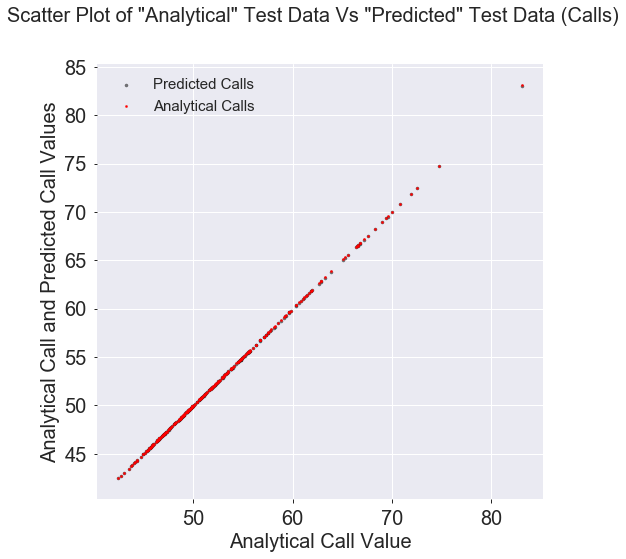

In [34]:
##prediction call vs analytical call
X = data['testcall']
Y1 = data['predcall']
Y2 = data['testcall']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of "Analytical" Test Data Vs "Predicted" Test Data (Calls)', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Calls')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0,label='Analytical Calls')
plt.xlabel('Analytical Call Value', size=20)
plt.ylabel('Analytical Call and Predicted Call Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Puts Tests Vs Predictions

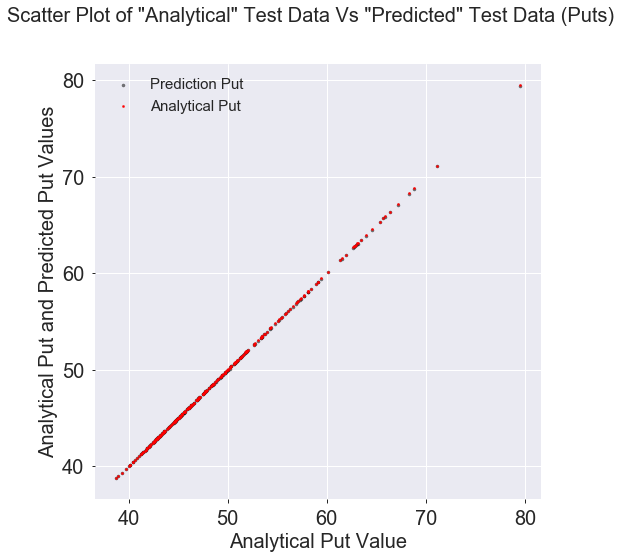

In [35]:
X = data['testput']
Y1 = data['predput']
Y2 = data['testput']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of "Analytical" Test Data Vs "Predicted" Test Data (Puts)', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Prediction Put')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0,label='Analytical Put')
plt.xlabel('Analytical Put Value',size=20)
plt.ylabel('Analytical Put and Predicted Put Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()


In [36]:
##Erros in % for calls
CallErrors=100*(data['predcall']-data['testcall'])/data['testcall']
CallErrors.tail(50)

Date
2019-11-08   -0.004236
2019-11-11   -0.023762
2019-11-12   -0.024363
2019-11-13   -0.034857
2019-11-14   -0.037016
2019-11-15   -0.006584
2019-11-18   -0.022404
2019-11-19   -0.036394
2019-11-20   -0.031013
2019-11-21   -0.041237
2019-11-22   -0.016050
2019-11-25   -0.000702
2019-11-26    0.013241
2019-11-27    0.002788
2019-11-29   -0.032245
2019-12-02   -0.096127
2019-12-03   -0.110535
2019-12-04   -0.092720
2019-12-05   -0.087201
2019-12-06   -0.070478
2019-12-09   -0.132357
2019-12-10   -0.125764
2019-12-11   -0.111953
2019-12-12   -0.090675
2019-12-13   -0.038973
2019-12-16   -0.020831
2019-12-17   -0.028479
2019-12-18   -0.042126
2019-12-19   -0.041728
2019-12-20   -0.046195
2019-12-23   -0.052185
2019-12-24   -0.055133
2019-12-26   -0.058862
2019-12-27   -0.099443
2019-12-30   -0.150561
2019-12-31   -0.111905
2020-01-02   -0.053691
2020-01-03   -0.124747
2020-01-06   -0.122649
2020-01-07   -0.115395
2020-01-08   -0.106097
2020-01-09   -0.062812
2020-01-10   -0.061232
2020-0

In [37]:
print('average error for analytical calls vs predictied calls (in percentage): ' ,CallErrors.sum()/len(data['testcall']))

average error for analytical calls vs predictied calls (in percentage):  -0.03182763675171907


In [38]:
##Erros in % for puts
PutErrors=100*(data['predput']-data['testput'])/data['testput']
PutErrors.tail(50)

Date
2019-11-08   -0.004433
2019-11-11   -0.025722
2019-11-12   -0.026369
2019-11-13   -0.037730
2019-11-14   -0.040061
2019-11-15   -0.006938
2019-11-18   -0.024195
2019-11-19   -0.039376
2019-11-20   -0.033561
2019-11-21   -0.044615
2019-11-22   -0.017300
2019-11-25   -0.000454
2019-11-26    0.014907
2019-11-27    0.003443
2019-11-29   -0.034853
2019-12-02   -0.103252
2019-12-03   -0.118235
2019-12-04   -0.099640
2019-12-05   -0.093818
2019-12-06   -0.076076
2019-12-09   -0.141584
2019-12-10   -0.134632
2019-12-11   -0.120176
2019-12-12   -0.097725
2019-12-13   -0.042100
2019-12-16   -0.022288
2019-12-17   -0.030626
2019-12-18   -0.045469
2019-12-19   -0.044998
2019-12-20   -0.049799
2019-12-23   -0.056289
2019-12-24   -0.059486
2019-12-26   -0.063477
2019-12-27   -0.107228
2019-12-30   -0.161589
2019-12-31   -0.120558
2020-01-02   -0.057801
2020-01-03   -0.134272
2020-01-06   -0.132069
2020-01-07   -0.124301
2020-01-08   -0.114368
2020-01-09   -0.067630
2020-01-10   -0.065956
2020-0

In [39]:
#Average analytical put vs predicted put error
print('average error for analytical puts vs predictied puts (in percentage): ' ,PutErrors.sum()/len(data['testput']))

average error for analytical puts vs predictied puts (in percentage):  -0.03410869146723576


## Time-Series of Forecast Errors (Predictions Vs Analyticals) 

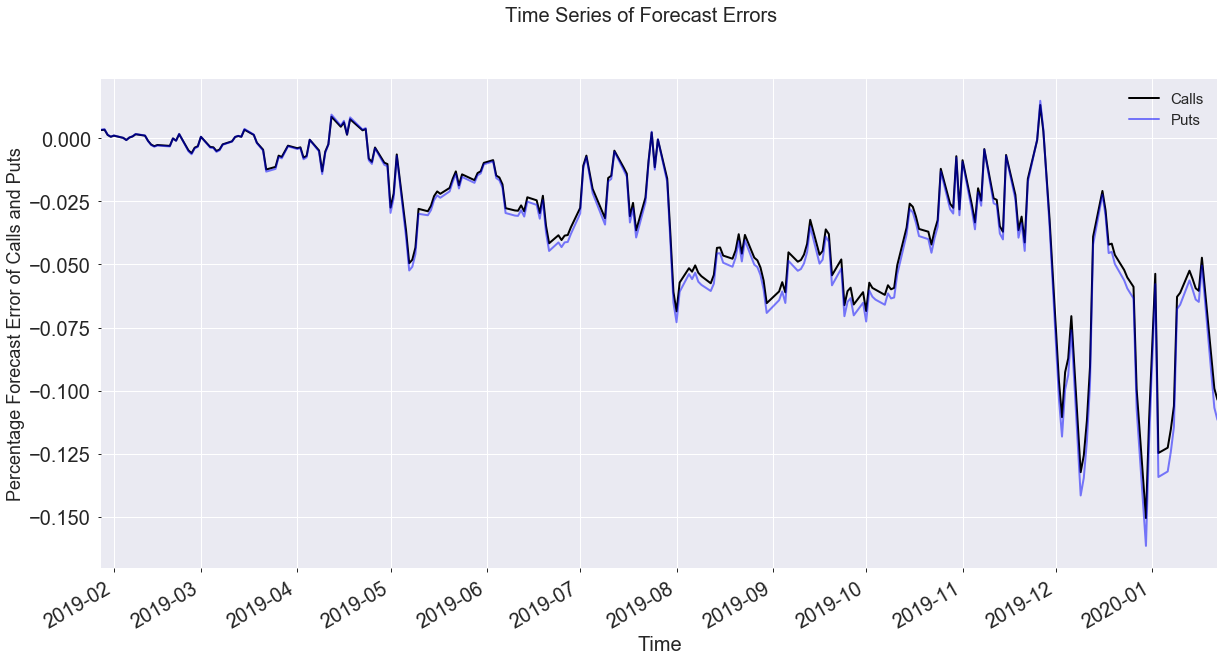

In [40]:

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Time Series of Forecast Errors', fontsize=20)
CallErrors.plot(linewidth=2, fontsize=20, color='black', alpha=1.0, label='Calls')
PutErrors.plot(linewidth=2, fontsize=20, color='blue', alpha=0.5, label='Puts')
#plt.title('Time Series of Call Errors', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Percentage Forecast Error of Calls and Puts', fontsize=18)
plt.legend(fontsize=15)
plt.show()


## From the above -> Forecast Errors vary between -0.15% and 0.0125%. The forecast errors tend to underestimate by a larger magnitude as S&P prices hit new highs

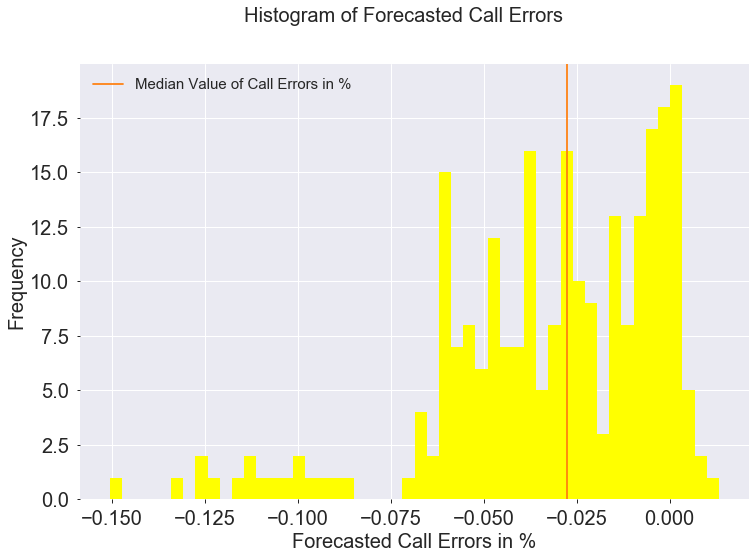

In [41]:
median=CallErrors.sort_values(ascending=True).iloc[round(0.5*len(CallErrors))]
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Forecasted Call Errors', fontsize=20)
CallErrors.hist(bins=50, color='yellow')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Forecasted Call Errors in %', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(median, label='Median Value of Call Errors in %',color='C1')
plt.legend(fontsize=15)
plt.show()

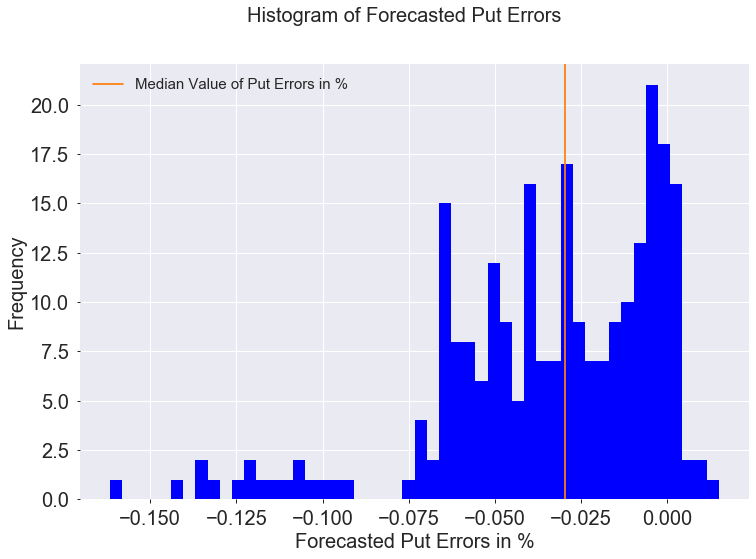

In [42]:
median=PutErrors.sort_values(ascending=True).iloc[round(0.5*len(PutErrors))]
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Forecasted Put Errors', fontsize=20)
PutErrors.hist(bins=50, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Forecasted Put Errors in %', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axvline(median, label='Median Value of Put Errors in %',color='C1')
plt.legend(fontsize=15)
plt.show()

## Below, applying 749 shocks to Feb 6th,2020 S&P index closing price of 3345.78 and VIX of 14.96 (The first set of prices are based on the Regression Prediction, The second set of prices are based on the Analytical BS. Then we compare the two distributions to measure the quality of our regression model)

In [43]:
##original data
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn,AnalyticalCallVal,AnalyticalPutVal
Date,,,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259,33.217525,30.316156
2017-02-01,2279.550049,11.81,0.000298,-0.015013,32.751078,29.848843
2017-02-02,2280.850098,11.93,0.000570,0.010161,33.087509,30.183618
2017-02-03,2297.419922,10.97,0.007265,-0.080469,30.767502,27.842516
2017-02-06,2292.560059,11.37,-0.002115,0.036463,31.766955,28.848156
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421,49.587800,45.400003
2020-01-16,3316.810059,12.32,0.008367,-0.008052,49.617601,45.394766
2020-01-17,3329.620117,12.10,0.003862,-0.017857,48.958798,44.719654


In [44]:
shock = pd.DataFrame({'id':[i for i in range(749)],'PresentValue' : [3345.78]*749 , 'PresentVolatility' : [14.96]*749, 'IndexShock': df_merge['IndexReturn']+1,'VixShock': df_merge['VixReturn']+1})

In [45]:
shock.head()

,id,PresentValue,PresentVolatility,IndexShock,VixShock
Date,,,,,
2017-01-31,0,3345.78,14.96,0.999110,1.009259
2017-02-01,1,3345.78,14.96,1.000298,0.984987
2017-02-02,2,3345.78,14.96,1.000570,1.010161
2017-02-03,3,3345.78,14.96,1.007265,0.919531
2017-02-06,4,3345.78,14.96,0.997885,1.036463


In [46]:
shock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2017-01-31 to 2020-01-22
Data columns (total 5 columns):
id                   749 non-null int64
PresentValue         749 non-null float64
PresentVolatility    749 non-null float64
IndexShock           749 non-null float64
VixShock             749 non-null float64
dtypes: float64(4), int64(1)
memory usage: 35.1 KB


In [47]:
shock=shock.reset_index()

In [48]:
shock = shock.drop(shock.columns[[0, 1]], axis=1)

In [49]:
shock

,PresentValue,PresentVolatility,IndexShock,VixShock
0,3345.78,14.96,0.999110,1.009259
1,3345.78,14.96,1.000298,0.984987
2,3345.78,14.96,1.000570,1.010161
3,3345.78,14.96,1.007265,0.919531
4,3345.78,14.96,0.997885,1.036463
...,...,...,...,...
744,3345.78,14.96,1.001870,1.002421
745,3345.78,14.96,1.008367,0.991948
746,3345.78,14.96,1.003862,0.982143
747,3345.78,14.96,0.997348,1.061983


In [50]:
shock['PresentValueShockIncorporated']=shock['PresentValue']*shock['IndexShock']
shock['PresentVolatilityShockIncorporated']=shock['PresentVolatility']*shock['VixShock']

In [51]:
shock

,PresentValue,PresentVolatility,IndexShock,VixShock,PresentValueShockIncorporated,PresentVolatilityShockIncorporated
0,3345.78,14.96,0.999110,1.009259,3342.802573,15.098519
1,3345.78,14.96,1.000298,0.984987,3346.778259,14.735413
2,3345.78,14.96,1.000570,1.010161,3347.688130,15.112007
3,3345.78,14.96,1.007265,0.919531,3370.086282,13.756178
4,3345.78,14.96,0.997885,1.036463,3338.702481,15.505488
...,...,...,...,...,...,...
744,3345.78,14.96,1.001870,1.002421,3352.037268,14.996223
745,3345.78,14.96,1.008367,0.991948,3373.772646,14.839549
746,3345.78,14.96,1.003862,0.982143,3358.701945,14.692857
747,3345.78,14.96,0.997348,1.061983,3336.907066,15.887273


## Pricing the 499 schock scenarios, using the parameters of Gaussian Regression which was tuned  in section 3 

In [52]:
indexXtest=shock[['PresentValueShockIncorporated','PresentVolatilityShockIncorporated']]


indexypred= gpr.predict(indexXtest)
#gp.predict(indexXtest, return_std=True)
#gp.score(indexXtest,indexypred)



#transformer = PolynomialFeatures(degree=2, include_bias=False)
#transformer.fit(index_X_train)
#x_ = transformer.transform(index_X_train)
#########x___ = transformer.transform(indexXtest)
#print(x_)
#model = LinearRegression().fit(x_, index_y_train)
#r_sq = model.score(x_, index_y_train)

##########indexypred = model.predict(x___)

In [53]:
indexypred

array([[60.63922151, 56.3839592 ],
       [59.31391395, 55.05360639],
       [60.77726783, 56.51580628],
       ...,
       [59.35568001, 55.08024428],
       [63.55843154, 59.31065173],
       [60.44492973, 56.18466197]])

In [54]:
future_data_reg_dependent = pd.DataFrame({'predcall': indexypred[0:,0],'predput': indexypred[0:,1]})

In [55]:
a=future_data_reg_dependent['predcall'].sort_values(ascending=True)
b=future_data_reg_dependent['predput'].sort_values(ascending=True)

In [56]:
#1st percentile predicted calls
first_predicted_call=a.iloc[round(0.01*len(a))]
#fiftyth percentile predicted calls
fiftyth_predicted_call=a.iloc[round(0.50*len(a))]
#99th percentile predicted calls
ninteyninth_predicted_call=a.iloc[round(0.99*len(a))]
#print(fifth,ninteyfifth)

## Predicted Call, Value At Risk

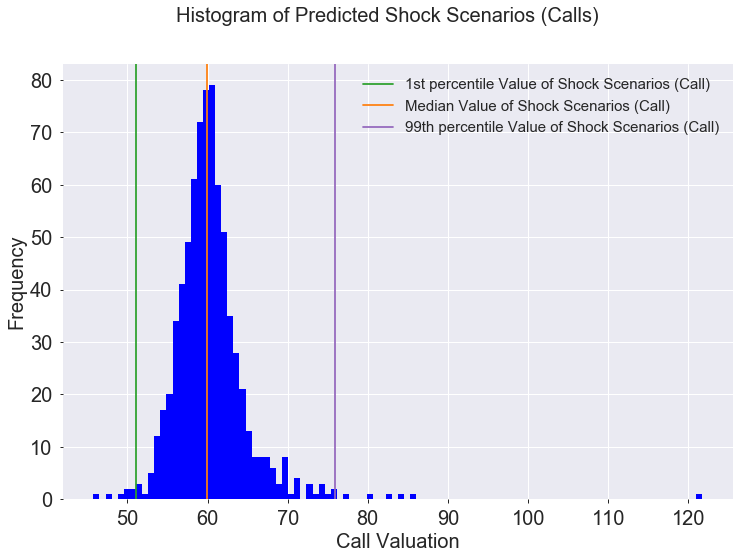

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Predicted Shock Scenarios (Calls)', fontsize=20)
future_data_reg_dependent['predcall'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Call Valuation', fontsize=20)
plt.axvline(first_predicted_call,label='1st percentile Value of Shock Scenarios (Call)',color='C2')
plt.axvline(fiftyth_predicted_call,label='Median Value of Shock Scenarios (Call)',color='C1')
plt.axvline(ninteyninth_predicted_call,label='99th percentile Value of Shock Scenarios (Call)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Predicted Put, Value At Risk

In [58]:
#1st percentile predicted put
first_predicted_put=b.iloc[round(0.01*len(b))]
#fiftyth percentile predicted put
fiftyth_predicted_put=b.iloc[round(0.50*len(b))]
#99th percentile predicted put
ninteyninth_predicted_put=b.iloc[round(0.99*len(b))]

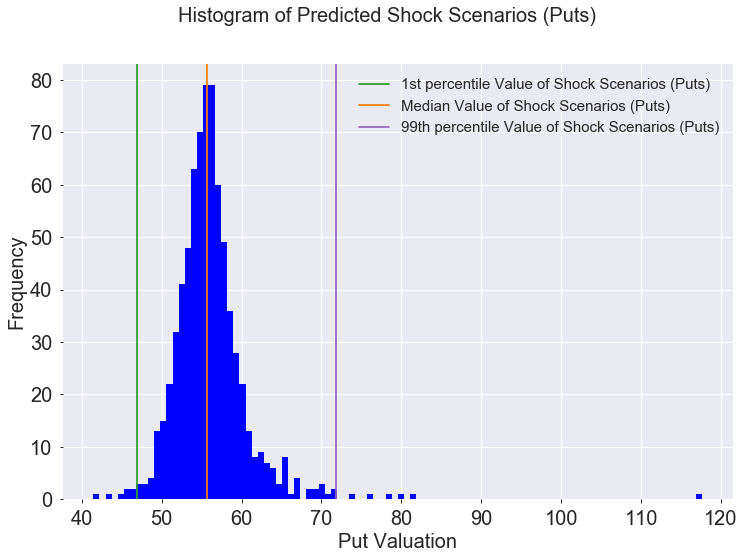

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Predicted Shock Scenarios (Puts)', fontsize=20)
future_data_reg_dependent['predput'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Put Valuation', fontsize=20)
plt.axvline(first_predicted_put,label='1st percentile Value of Shock Scenarios (Puts)',color='C2')
plt.axvline(fiftyth_predicted_put,label='Median Value of Shock Scenarios (Puts)',color='C1')
plt.axvline(ninteyninth_predicted_put,label='99th percentile Value of Shock Scenarios (Puts)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Below: Applying analytical BS onto the 499 shock scenarios:

In [60]:
indexXtest

,PresentValueShockIncorporated,PresentVolatilityShockIncorporated
0,3342.802573,15.098519
1,3346.778259,14.735413
2,3347.688130,15.112007
3,3370.086282,13.756178
4,3338.702481,15.505488
...,...,...
744,3352.037268,14.996223
745,3373.772646,14.839549
746,3358.701945,14.692857
747,3336.907066,15.887273


In [61]:
def black_scholes_row(row):
    row['ShockAnalyticalCallVal']= bs_call(row['PresentValueShockIncorporated'],row['PresentValueShockIncorporated'],31/365,0.015,row['PresentVolatilityShockIncorporated']/100)
    row['ShockAnalyticalPutVal']= bs_put(row['PresentValueShockIncorporated'],row['PresentValueShockIncorporated'],31/365,0.015,row['PresentVolatilityShockIncorporated']/100)
    return row


FutureAnalyticalShock=indexXtest.apply(lambda row: black_scholes_row(row), axis=1)
FutureAnalyticalShock

,PresentValueShockIncorporated,PresentVolatilityShockIncorporated,ShockAnalyticalCallVal,ShockAnalyticalPutVal
0,3342.802573,15.098519,60.790547,56.534620
1,3346.778259,14.735413,59.451800,55.190811
2,3347.688130,15.112007,60.931824,56.669676
3,3370.086282,13.756178,56.034065,51.743401
4,3338.702481,15.505488,62.293685,58.042978
...,...,...,...,...
744,3352.037268,14.996223,60.560332,56.292647
745,3373.772646,14.839549,60.339267,56.043910
746,3358.701945,14.692857,59.497649,55.221479
747,3336.907066,15.887273,63.739470,59.491049


In [62]:
indexytest=FutureAnalyticalShock[['ShockAnalyticalCallVal','ShockAnalyticalPutVal']]

In [63]:
c=FutureAnalyticalShock['ShockAnalyticalCallVal'].sort_values(ascending=True)
d=FutureAnalyticalShock['ShockAnalyticalPutVal'].sort_values(ascending=True)

#1st percentile future analytical shock calls
first_analytical_call=c.iloc[round(0.01*len(c))]
#fiftyth percentile future analytical shock calls
fiftyth_analytical_call=c.iloc[round(0.50*len(c))]
#99th percentile future analytical shock calls
ninteyninth_analytical_call=c.iloc[round(0.99*len(c))]


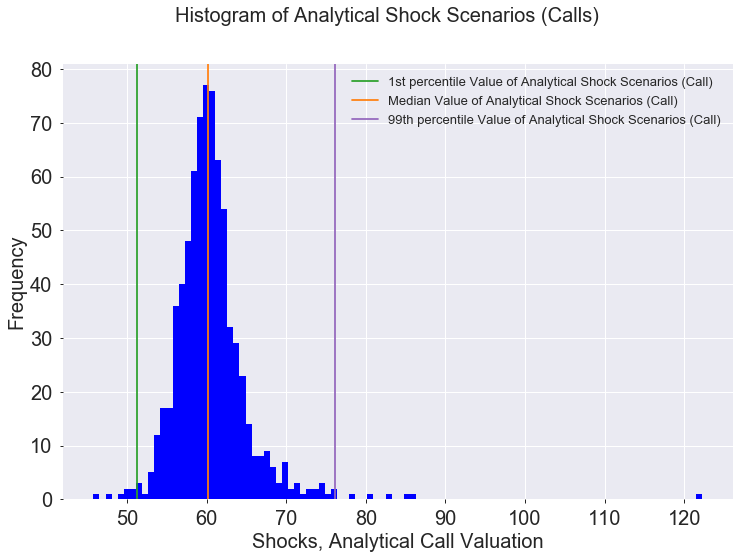

In [64]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Analytical Shock Scenarios (Calls)', fontsize=20)
FutureAnalyticalShock['ShockAnalyticalCallVal'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Shocks, Analytical Call Valuation', fontsize=20)
plt.axvline(first_analytical_call,label='1st percentile Value of Analytical Shock Scenarios (Call)',color='C2')
plt.axvline(fiftyth_analytical_call,label='Median Value of Analytical Shock Scenarios (Call)',color='C1')
plt.axvline(ninteyninth_analytical_call,label='99th percentile Value of Analytical Shock Scenarios (Call)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

In [65]:
#1st percentile future analytical shock put
first_analytical_put=d.iloc[round(0.01*len(d))]
#fiftyth percentile future analytical shock put
fiftyth_analytical_put=d.iloc[round(0.50*len(d))]
#99th percentile future analytical shock put
ninteyninth_analytical_put=d.iloc[round(0.99*len(d))]

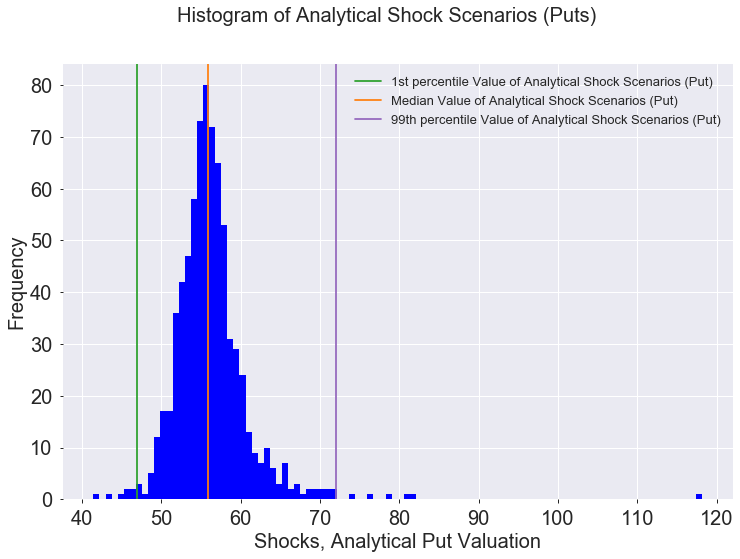

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Analytical Shock Scenarios (Puts)', fontsize=20)
FutureAnalyticalShock['ShockAnalyticalPutVal'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Shocks, Analytical Put Valuation', fontsize=20)
plt.axvline(first_analytical_put,label='1st percentile Value of Analytical Shock Scenarios (Put)',color='C2')
plt.axvline(fiftyth_analytical_put,label='Median Value of Analytical Shock Scenarios (Put)',color='C1')
plt.axvline(ninteyninth_analytical_put,label='99th percentile Value of Analytical Shock Scenarios (Put)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

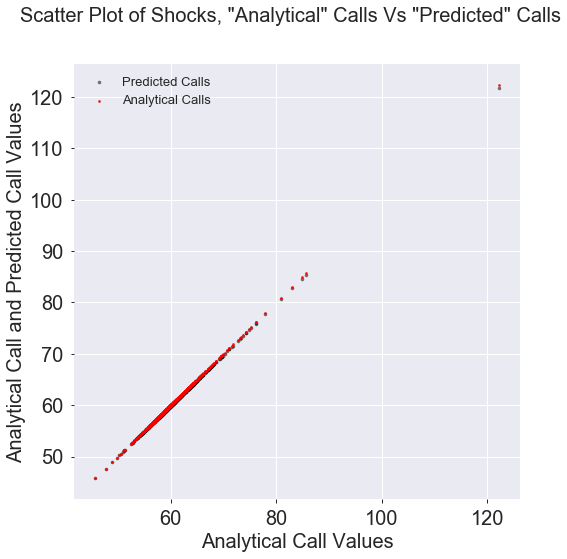

In [67]:
##prediction call vs analytical call
X = FutureAnalyticalShock['ShockAnalyticalCallVal']
Y1 = future_data_reg_dependent['predcall']
Y2 = FutureAnalyticalShock['ShockAnalyticalCallVal']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of Shocks, "Analytical" Calls Vs "Predicted" Calls', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Calls')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0, label='Analytical Calls')
plt.xlabel('Analytical Call Values', size=20)
plt.ylabel('Analytical Call and Predicted Call Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

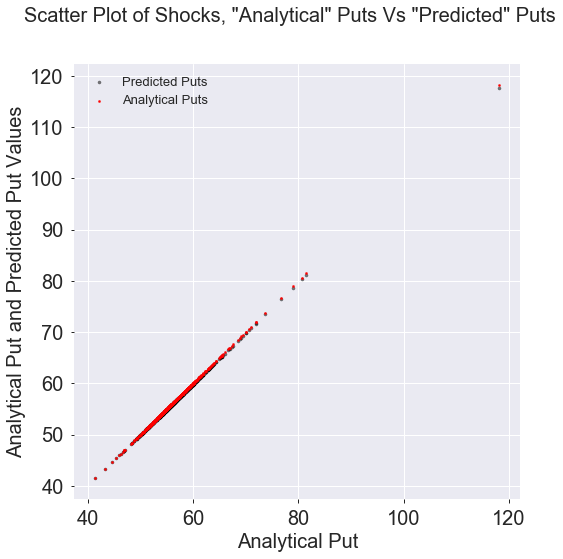

In [68]:
X = FutureAnalyticalShock['ShockAnalyticalPutVal']
Y1 = future_data_reg_dependent['predput']
Y2 = FutureAnalyticalShock['ShockAnalyticalPutVal']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of Shocks, "Analytical" Puts Vs "Predicted" Puts', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Puts')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0, label='Analytical Puts')
plt.xlabel('Analytical Put', size=20)
plt.ylabel('Analytical Put and Predicted Put Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

## From the scatter plots above: Model behaves well under shock scenarios

In [69]:
ShockCallErrors=100*(future_data_reg_dependent['predcall']-FutureAnalyticalShock['ShockAnalyticalCallVal'])/FutureAnalyticalShock['ShockAnalyticalCallVal']
ShockPutErrors=100*(future_data_reg_dependent['predput']-FutureAnalyticalShock['ShockAnalyticalPutVal'])/FutureAnalyticalShock['ShockAnalyticalPutVal']

print('average error for Historical Data, analytical calls vs predictied calls (in percentage): ' ,CallErrors.sum()/len(data['testcall']))
print('average error for Historical Data: puts vs predictied puts (in percentage): ' ,PutErrors.sum()/len(data['testput']))
print('average error for Shocks, analytical calls vs predictied calls (in percentage): ' ,ShockCallErrors.sum()/len(future_data_reg_dependent['predcall']))
print('average error for Shocks, analytical puts vs predictied puts (in percentage): ' ,ShockPutErrors.sum()/len(future_data_reg_dependent['predput']))

average error for Historical Data, analytical calls vs predictied calls (in percentage):  -0.03182763675171907
average error for Historical Data: puts vs predictied puts (in percentage):  -0.03410869146723576
average error for Shocks, analytical calls vs predictied calls (in percentage):  -0.23962395961646923
average error for Shocks, analytical puts vs predictied puts (in percentage):  -0.25636766230665897


In [70]:
print("Historical Data: ",gpr.score(index_X_train, index_y_train))
print("Historical Data: ",gpr.score(index_X_test,index_y_test))
print("Historical Data: ",gpr.score(index_X_test,index_y_pred))
print("Future Shock: ",gpr.score(indexXtest,indexytest))
print("Future Shock: ",gpr.score(indexXtest,indexypred))


Historical Data:  0.9999999512000876
Historical Data:  0.9999869359499302
Historical Data:  1.0
Future Shock:  0.9990158910441214
Future Shock:  1.0


C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_avera

In [71]:
ShockPutErrors=100*(future_data_reg_dependent['predput']-FutureAnalyticalShock['ShockAnalyticalPutVal'])/FutureAnalyticalShock['ShockAnalyticalPutVal']
ShockCallErrors=100*(future_data_reg_dependent['predcall']-FutureAnalyticalShock['ShockAnalyticalCallVal'])/FutureAnalyticalShock['ShockAnalyticalCallVal']

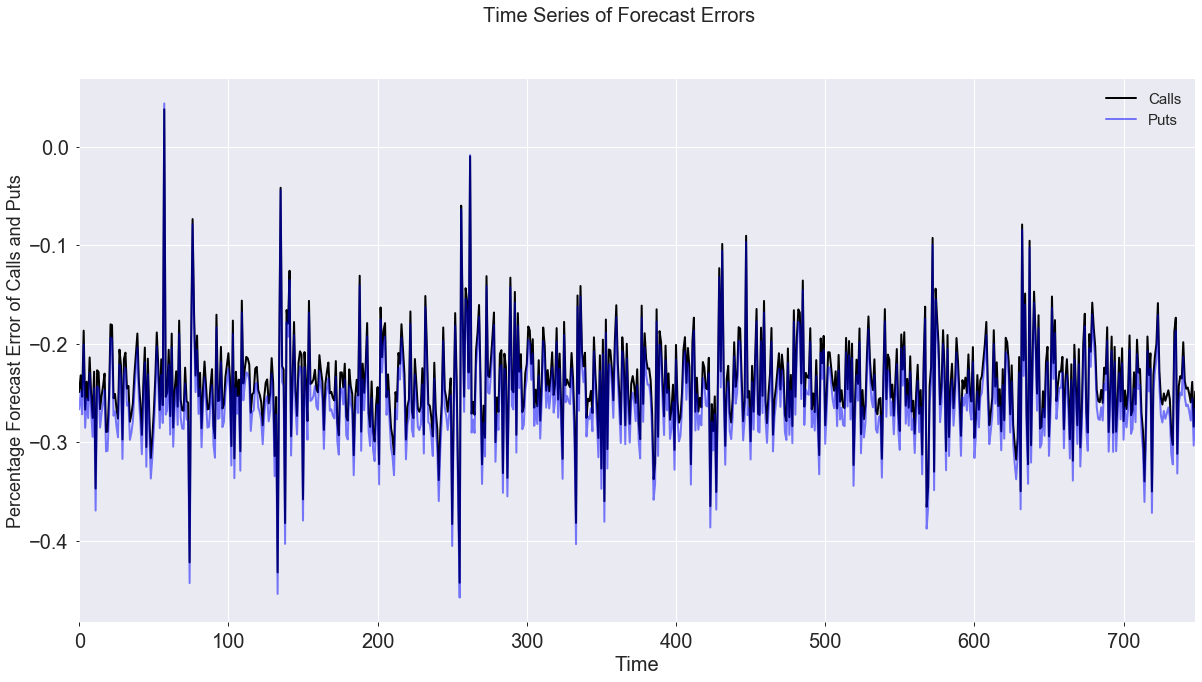

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Time Series of Forecast Errors', fontsize=20)
ShockCallErrors.plot(linewidth=2, fontsize=20, color='black', alpha=1.0, label='Calls')
ShockPutErrors.plot(linewidth=2, fontsize=20, color='blue', alpha=0.5, label='Puts')
#plt.title('Time Series of Call Errors', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Percentage Forecast Error of Calls and Puts', fontsize=18)
plt.legend(fontsize=15)
plt.show()

## RBF() is a mean-reverting kernel. DotProduct() when multiplied by RBF() allows incporporating a drift component into the system. I have tested various DotProduct() values during the training phase. When optimizing, the value of DotProduct() kernel is always bounding to the minium value the user defines. Therefore, the system requires a very minor drift component to learn the data, however that very minor drift component (DotProduct() kernel) is necessary; without it the model fails when S&P 500 tests new highs. RBF() kernel alone is only useful in range market. I speculate in the research paper, the authors preerence for RBF() alone comes from the mean-reverting input data, they generated. 